In [1]:
from bs4 import BeautifulSoup
import requests
import itertools
import re
result = []
for j in range(8):
    url = "https://icook.tw/categories/63?page={}".format(j)
    rescook = requests.get(url)
    soup = BeautifulSoup(rescook.text, "lxml")
    
    for i in range(12):
        text = soup.select('.material')[i].text[3:]
        text = text.split('、')
        text_unpr = []
        for q in text:
            text_unpr.append(re.sub(r'\([^)]*\)|【[^)]*】|［[^)]*］|（[^)]*）| [^)]*','',q))
        result.extend(list(itertools.combinations(text_unpr, 2)))
print('Number of total pairs:', len(result))
print('Some examples:', result[:6])

Number of total pairs: 4473
Some examples: [('牛番茄', '洋蔥'), ('牛番茄', '紅蘿蔔'), ('牛番茄', '馬鈴薯'), ('牛番茄', '西式芹菜'), ('牛番茄', '去骨雞腿'), ('牛番茄', '巴西里')]


/usr/local/lib/python3.4/dist-packages/matplotlib-1.5.2rc2_1932.g75a35ef-py3.4-linux-x86_64.egg/matplotlib/backends/backend_gtk3agg.py:18: UserWarning: The Gtk3Agg backend is known to not work on Python 3.x with pycairo. Try installing cairocffi.
  "The Gtk3Agg backend is known to not work on Python 3.x with pycairo. "


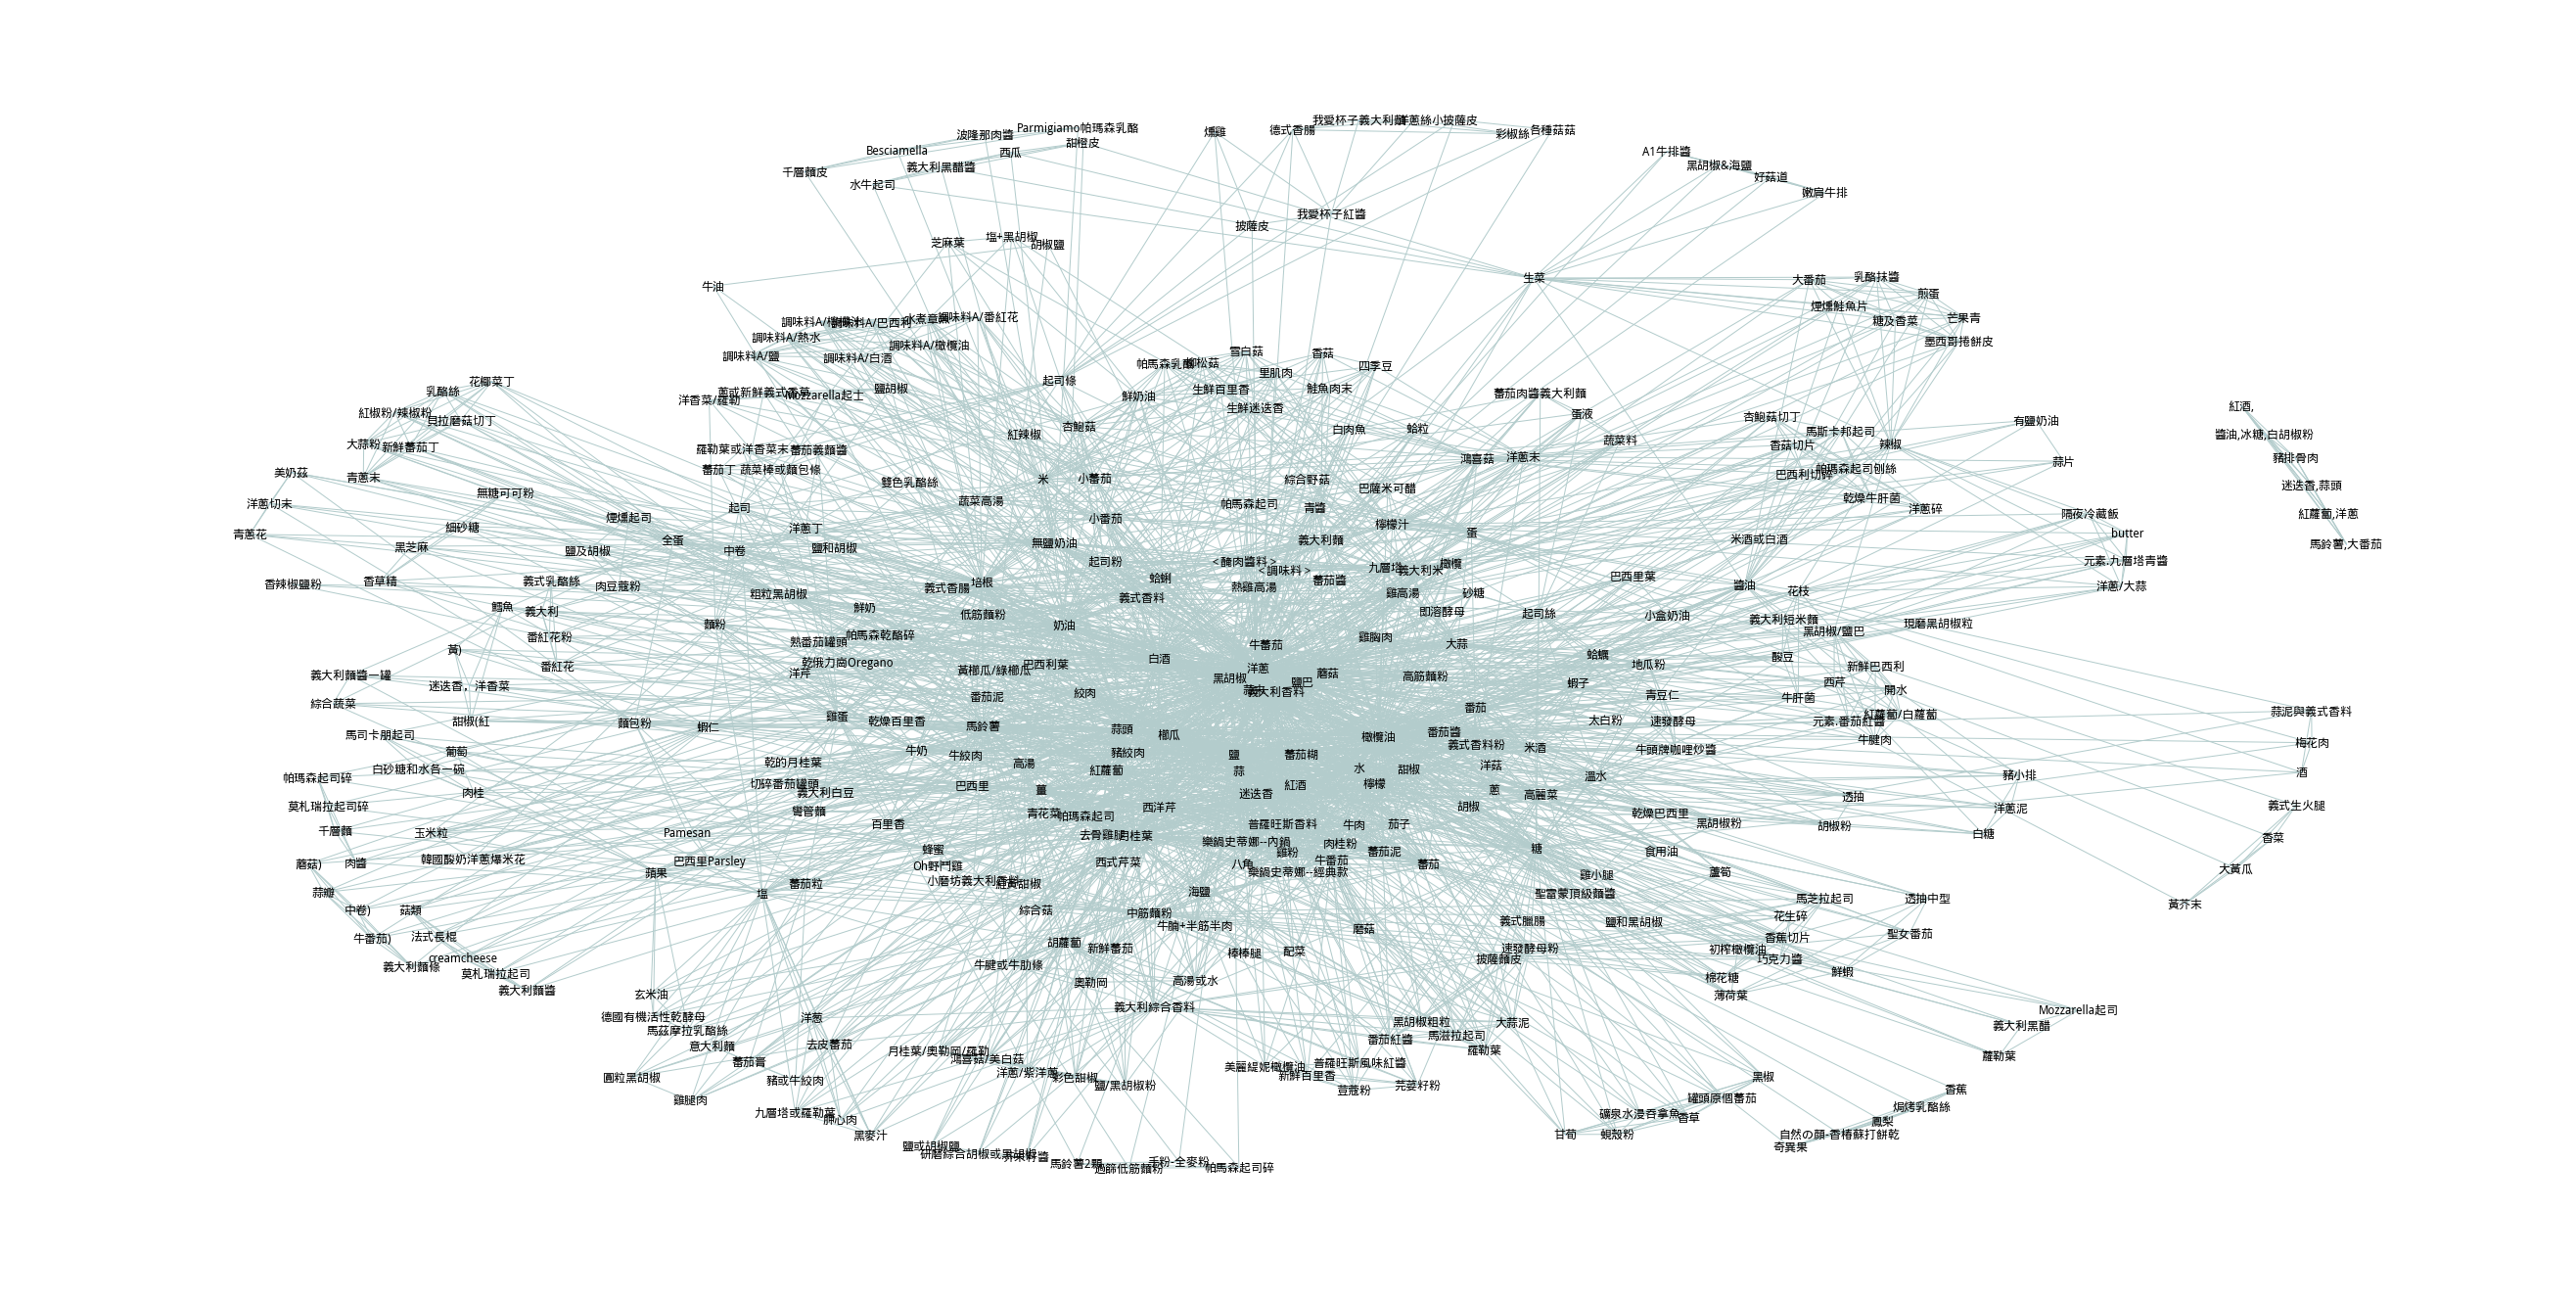

In [2]:
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib.font_manager as fm
%matplotlib inline

WQY = fm.FontProperties(fname = "/usr/share/fonts/truetype/wqy/wqy-microhei.ttc")
nx.set_fontproperties(WQY)

default_weight = 0.2
G = nx.Graph()

BLUE = "#99CCFF"
GRAY = "#b3cccc"

for nodes in result:
    n0 = nodes[0]
    n1 = nodes[1]
    if G.has_edge(n0,n1):   
        G[n0][n1]['weight'] += default_weight
    else:
        G.add_edge(n0,n1, weight = default_weight)


nx.draw(G, node_color = BLUE, with_labels = True,edge_color = GRAY, node_size = 1)
fig = plt.gcf()
fig.set_size_inches(36, 18)
fig.savefig('italy_recipe.png', dpi=100)

In [3]:
import operator
from collections import Counter

sorted_dg = sorted(nx.degree(G).items(), key = operator.itemgetter(1), reverse = True)
print('Degree:',sorted_dg[:15])

print()

sorted_close = sorted(nx.closeness_centrality(G).items(), key = operator.itemgetter(1), reverse = True)
print('Closeness centrality:',sorted_close[:15])

print()

sorted_degree = sorted(nx.degree_centrality(G).items(), key = operator.itemgetter(1), reverse = True)
print('Degree centrality:',sorted_degree[:15])


Degree: [('洋蔥', 196), ('橄欖油', 165), ('鹽', 154), ('黑胡椒', 110), ('月桂葉', 86), ('白酒', 83), ('奶油', 79), ('蒜頭', 79), ('水', 74), ('培根', 72), ('義大利香料', 69), ('西洋芹', 67), ('馬鈴薯', 66), ('紅蘿蔔', 61), ('紅酒', 59)]

Closeness centrality: [('洋蔥', 0.6674558823529412), ('橄欖油', 0.6238762886597937), ('鹽', 0.6102453781512606), ('黑胡椒', 0.5700094191522763), ('白酒', 0.5460090225563909), ('培根', 0.536330871491876), ('月桂葉', 0.532398826979472), ('奶油', 0.5316193265007321), ('義大利香料', 0.5277558139534884), ('蒜頭', 0.526989840348331), ('水', 0.5262260869565217), ('馬鈴薯', 0.5254645441389291), ('紅蘿蔔', 0.5247052023121388), ('西洋芹', 0.5216896551724137), ('番茄醬', 0.5157613636363636)]

Degree centrality: [('洋蔥', 0.5226666666666666), ('橄欖油', 0.44), ('鹽', 0.4106666666666667), ('黑胡椒', 0.29333333333333333), ('月桂葉', 0.22933333333333333), ('白酒', 0.22133333333333333), ('奶油', 0.21066666666666667), ('蒜頭', 0.21066666666666667), ('水', 0.19733333333333333), ('培根', 0.192), ('義大利香料', 0.184), ('西洋芹', 0.17866666666666667), ('馬鈴薯', 0.176), ('紅蘿蔔'

In [4]:
nd = G.number_of_nodes()
possible_edges = nd*(nd-1)/2

print('Total possible edges:',possible_edges)
print('Total edges in the graph:',G.number_of_edges())

density = round(nx.density(G),4)
print('Density:',density)
print()
print(nx.info(G))

Total possible edges: 70500.0
Total edges in the graph: 3123
Density: 0.0443

Name: 
Type: Graph
Number of nodes: 376
Number of edges: 3123
Average degree:  16.6117


In [9]:
import operator
from collections import Counter
myDict = Counter(result)
sorted_x = sorted(myDict.items(), key = operator.itemgetter(1), reverse = True)
print('Number of sorted unique pairs:', len(sorted_x))
print(sorted_x[:15])

Number of sorted unique pairs: 3297
[(('洋蔥', '黑胡椒'), 17), (('洋蔥', '橄欖油'), 16), (('洋蔥', '鹽'), 14), (('洋蔥', '月桂葉'), 11), (('洋蔥', '白酒'), 10), (('鹽', '黑胡椒'), 9), (('洋蔥', '紅酒'), 8), (('洋蔥', '番茄醬'), 8), (('洋蔥', '鹽巴'), 7), (('洋蔥', '義大利香料'), 7), (('鹽', '橄欖油'), 7), (('黑胡椒', '橄欖油'), 7), (('蒜頭', '月桂葉'), 6), (('洋蔥', '紅蘿蔔'), 6), (('紅蘿蔔', '鹽'), 6)]


In [6]:
max_degree_item = max(nx.degree(G).items(),key=operator.itemgetter(1))
print(max_degree_item[1])

196


In [7]:
total = 0
for i,v in nx.degree(G).items():
    subv = max_degree_item[1] - v
    total += subv

dn = (nd-1)*(nd-2)
centr = total/dn
print('Group centrality:',round(centr,4))

Group centrality: 0.4809
